<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №2. Работа с векторными данными в GeoPandas**

In [22]:
%%capture
!pip install geopandas leafmap mapclassify # Устанавливаем библиотеку GeoPandas и необходимые зависимости

## **Задание №1. Операции с массивами NumPy и геопространственными координатами**


1. Создайте двумерный массив NumPy, содержащий широту и долготу следующих городов: Токио (35.6895, 139.6917), Нью-Йорк (40.7128, -74.0060), Лондон (51.5074, -0.1278) и Париж (48.8566, 2.3522).


In [3]:
import numpy as np

cities = np.array([
    [35.6895, 139.6917],
    [40.7128, -74.0060],
    [51.5074, -0.1278],
    [48.8566, 2.3522]
])
print("Координаты в градусах: \n", cities)

Координаты в градусах: 
 [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]


2. Преобразуйте значения широты и долготы из градусов в радианы с помощью функции np.radians().


In [4]:
radians = np.radians(cities)
print("Координаты в радианах:\n", radians)

Координаты в радианах:
 [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]




3. Рассчитайте поэлементную разницу между координатами Токио и других городов в радианах.

In [5]:
tokyo_rad = radians[0]
difference = radians - tokyo_rad
print("Разница с Токио в радианах:\n", difference)

Разница с Токио в радианах:
 [[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## **Задание 2. Операции с DataFrame Pandas и геопространственными данными**


1. Загрузите набор данных о городах мира по следующему URL с помощью Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


In [10]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)


2. Отобразите первые 5 строк и проверьте наличие отсутствующих значений.


In [11]:
print("Первые 5 строк:")
print(df.head())
print("Проверка пропущенных значений:")
print(df.isnull().sum())

Первые 5 строк:
   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062
Проверка пропущенных значений:
id            0
name          0
country       0
latitude      0
longitude     0
population    0
dtype: int64


3. Отфильтруйте набор данных, чтобы включить только города с населением более 1 миллиона человек.


In [14]:
df_filtered = df[df['population'] > 1000000]
print('Города с населением больше 1 млн:\n', df_filtered.head())

Города с населением больше 1 млн:
       id            name country  latitude  longitude  population
97    98           Turin     ITA  45.07039    7.66996     1652000
103  104           Lille     FRA  50.64997    3.08001     1044000
123  124  San Bernardino     USA  34.12038 -117.30003     1745000
124  125      Bridgeport     USA  41.17998  -73.19996     1018000
126  127      Manchester     GBR  53.50042   -2.24799     2230000


4. Сгруппируйте города по странам и рассчитайте общую численность населения для каждой страны.


In [15]:
country_population = df.groupby('country')['population'].sum().reset_index()
print("общая численность населения для каждой страны:\n", country_population.head())

общая численность населения для каждой страны:
   country  population
0     AFG     4931702
1     AGO     6821544
2     ALB      895350
3     ALD       10682
4     AND       53998




5. Отсортируйте города по населению в порядке убывания и отобразите первые 10 городов.

In [18]:
top_city = df.sort_values(by='population', ascending=False).head(10)
print("первые 10 городов:\n", top_city[['name', 'country', 'population']])

первые 10 городов:
               name country  population
1239         Tokyo     JPN    35676000
1224      New York     USA    19040000
1230   Mexico City     MEX    19028000
1240        Mumbai     IND    18978000
1245     Sao Paulo     BRA    18845000
1148         Delhi     IND    15926000
1238      Shanghai     CHN    14987000
1243       Kolkata     IND    14787000
1175         Dhaka     BGD    12797394
1217  Buenos Aires     ARG    12795000


## **Задание №3. Создание и обработка GeoDataFrames с помощью GeoPandas**


1. Загрузите набор данных о зданиях Нью-Йорка из файла GeoJSON с помощью GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson

In [19]:
import geopandas as gpd

buildings_url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(buildings_url)

print("первые 5 строк:")
print(gdf.head())

первые 5 строк:
   fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0    2      15.05      23.30       19.18   6365.72      36  New York   
1    4      23.62      46.18       34.90   3287.84      36  New York   
2    5      19.98     109.60       64.79   2011.21      36  New York   
3    9      18.50      18.18       18.34   3110.32      36  New York   
4   34      21.53      32.84       27.18   5240.89      36  New York   

                                            geometry  
0  POLYGON ((-74.00129 40.71992, -74.00061 40.719...  
1  POLYGON ((-74.0032 40.71654, -74.00265 40.7163...  
2  POLYGON ((-74.01415 40.70324, -74.01342 40.703...  
3  POLYGON ((-73.98974 40.71924, -73.98924 40.720...  
4  POLYGON ((-74.00941 40.72351, -74.00816 40.723...  


2. Создайте график контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


<Axes: >

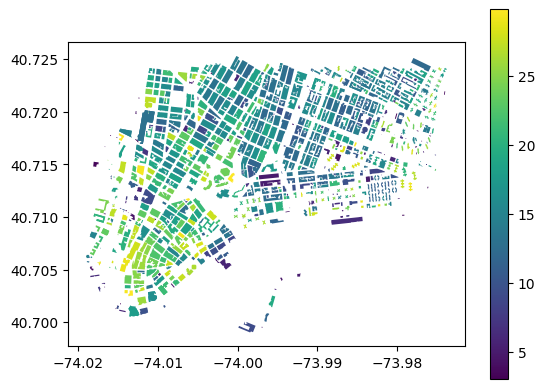

In [21]:
gdf.plot(column='height_MS', legend=True)

3. Создайте интерактивную карту контуров зданий и раскрасьте их в зависимости от высоты здания (используйте столбец `height_MS`).


In [24]:
import leafmap.foliumap as leafmap
m = leafmap.Map(center=[40.7128, -74.0060], zoom=15)
m.add_gdf(gdf, column="height_MS", scheme="Quantiles", legend_title="Height (m)")
m

4. Рассчитайте среднюю высоту зданий (используйте столбец `height_MS`).


In [26]:
average_height = gdf['height_MS'].mean()
print(f"средняя высота домов: {average_height:.2f} метров")

средняя высота домов: 15.45 метров


5. Выберите здания с высотой, превышающей среднюю высоту.


In [28]:
tall_buildings = gdf[gdf['height_MS'] > average_height]
print("здания с высотой, превышающей среднюю высоту: (штук)", len(tall_buildings))

здания с высотой, превышающей среднюю высоту: (штук) 524





6. Сохраните GeoDataFrame в новый файл GeoJSON.

In [29]:
tall_buildings.to_file("tall_nyc_buildings.geojson", driver='GeoJSON')
print("файл сохранён как 'tall_nyc_buildings.geojson'")

файл сохранён как 'tall_nyc_buildings.geojson'


## **Задание №4. Применение NumPy, Pandas и GeoPandas для обработки и анализа пространственных данных**


1. Используйте Pandas для загрузки набора данных о городах мира по следующему URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv


2. Отфильтруйте набор данных, чтобы включить только города с широтой между -40 и 60 (т.е. города, расположенные в Северном полушарии или вблизи экватора).


In [31]:
filtered_df = df[(df['latitude'] >= -40) & (df['latitude'] <= 60)]
print("Отфильтрованные города:\n", filtered_df.head())

Отфильтрованные города:
    id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


3. Создайте GeoDataFrame из отфильтрованного набора данных, преобразовав широту и долготу в геометрии.


In [34]:
gdf_cities = gpd.GeoDataFrame(
    filtered_df,
    geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude),
    crs="EPSG:4326"
)

4. Перепроецируйте GeoDataFrame в проекцию Меркатора (EPSG:3857).


In [35]:
gdf_mercator = gdf_cities.to_crs(epsg=3857)
print("после перепроецирования в меркатора:", gdf_mercator.crs)

после перепроецирования в меркатора: EPSG:3857


5. Рассчитайте расстояние (в метрах) между каждым городом и Парижем.


In [37]:
paris_point = gpd.GeoSeries([gpd.points_from_xy([2.3522], [48.8566])[0]], crs="EPSG:4326").to_crs(epsg=3857)[0]

gdf_mercator['distance_to_paris'] = gdf_mercator.geometry.distance(paris_point)
print("Расстояния до Парижа:\n", gdf_mercator[['name', 'country', 'distance_to_paris']])

Расстояния до Парижа:
                 name country  distance_to_paris
0              Bombo     UGA       7.039170e+06
1        Fort Portal     UGA       6.913985e+06
2            Potenza     ITA       1.976630e+06
3         Campobasso     ITA       1.791525e+06
4              Aosta     ITA       7.534054e+05
...              ...     ...                ...
1244  Rio de Janeiro     BRA       1.022160e+07
1245       Sao Paulo     BRA       1.048014e+07
1246          Sydney     AUS       1.949215e+07
1247       Singapore     SGP       1.284389e+07
1248       Hong Kong     CHN       1.298805e+07

[1132 rows x 3 columns]




6. Отобразите города на карте мира, раскрасив точки в зависимости от их расстояния до Парижа.

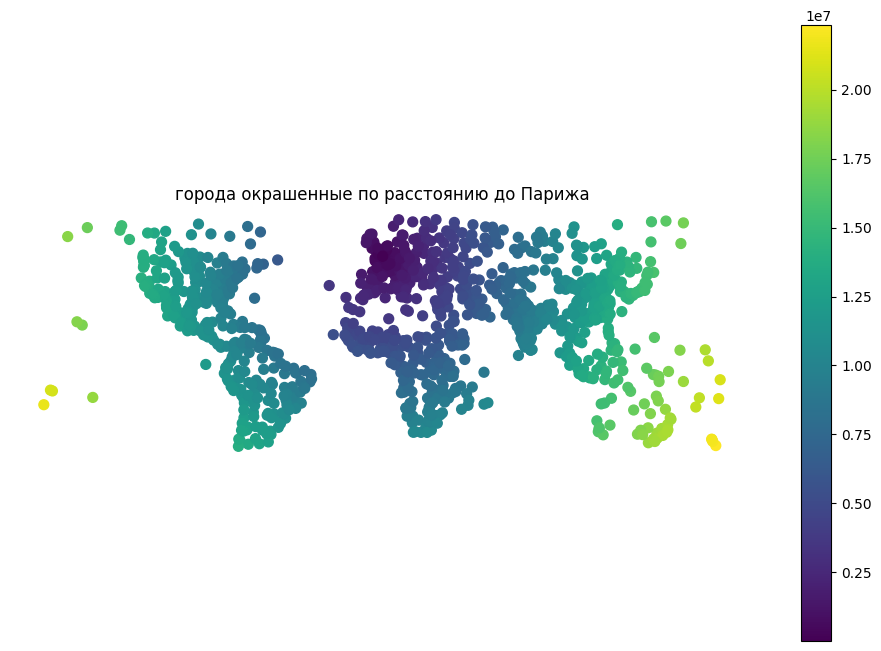

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
gdf_mercator.plot(ax=ax, column='distance_to_paris', legend=True, markersize=50)
ax.set_title("города окрашенные по расстоянию до Парижа")
plt.axis('off')
plt.show()